# Data Loading tutorial

To add the competition data Click File->Add or Upload data-> Search by URL -> https://www.kaggle.com/geoparslp/patreco3-multitask-affective-music

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

### Load samples file

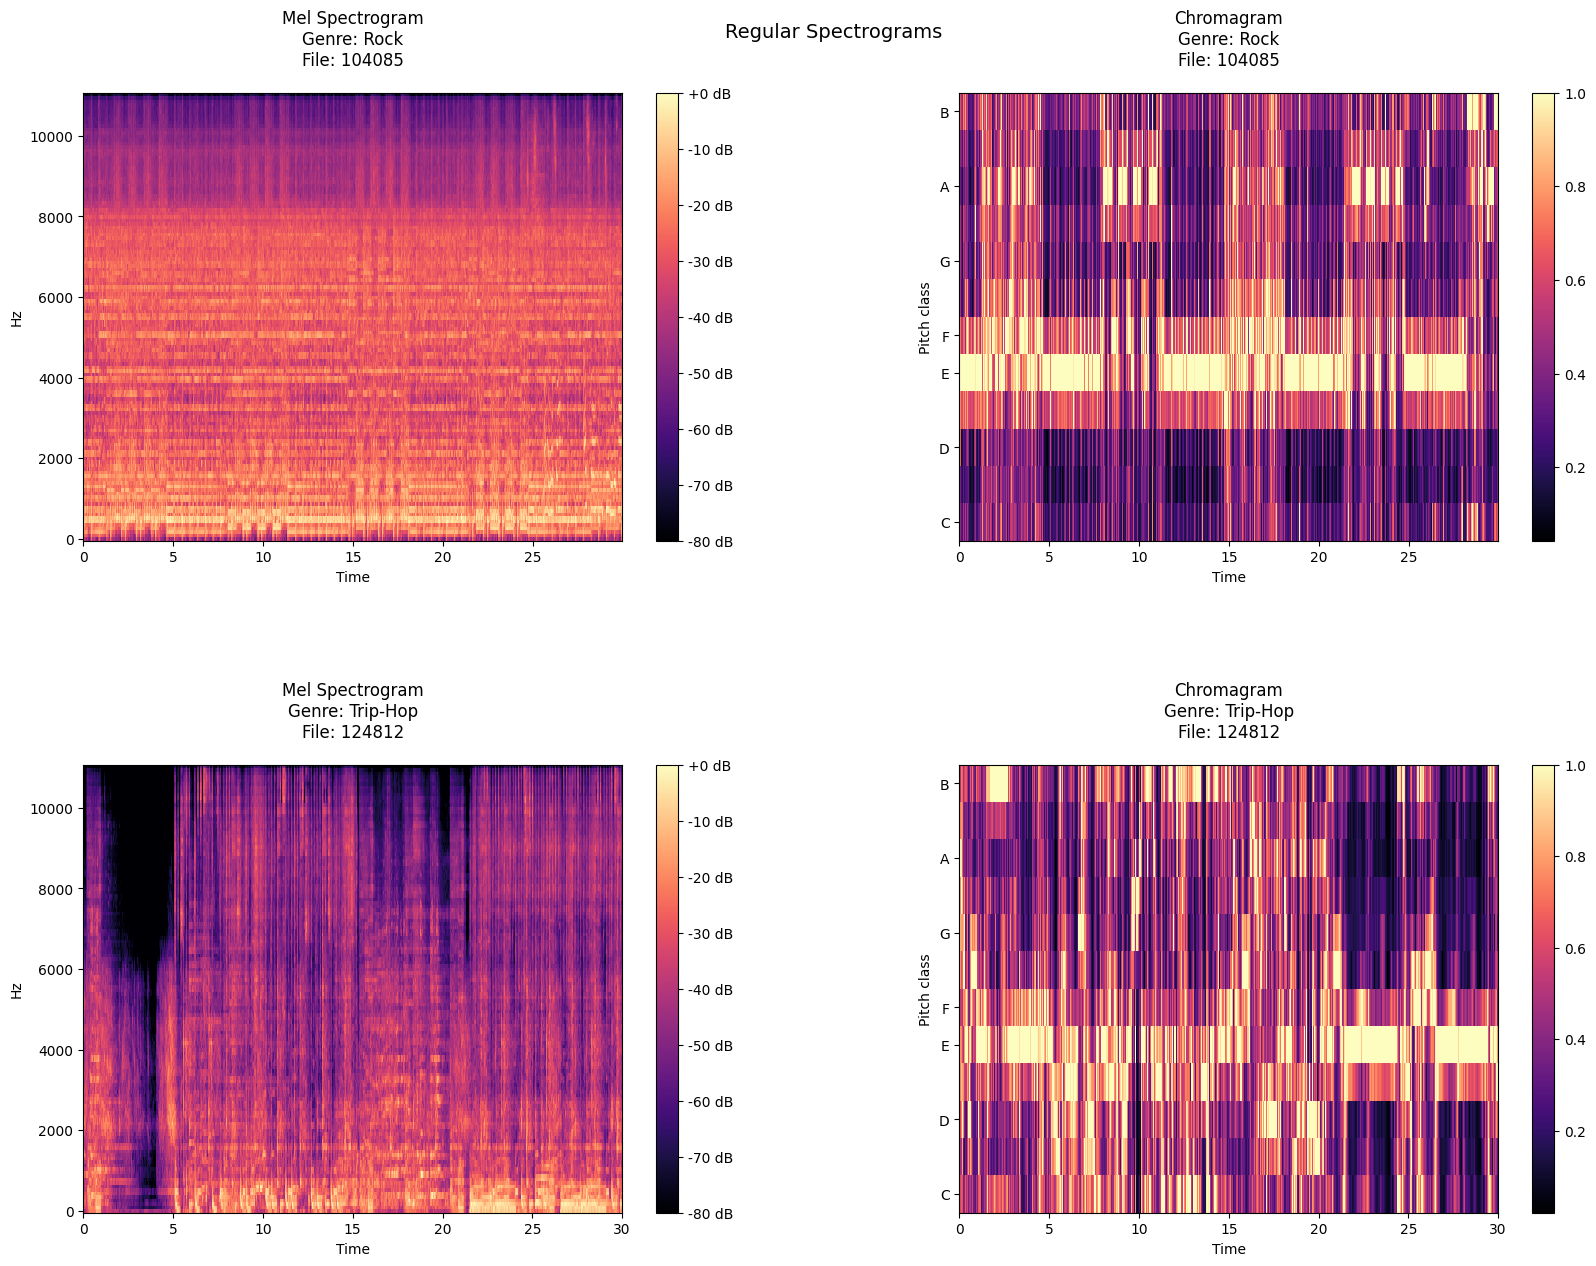

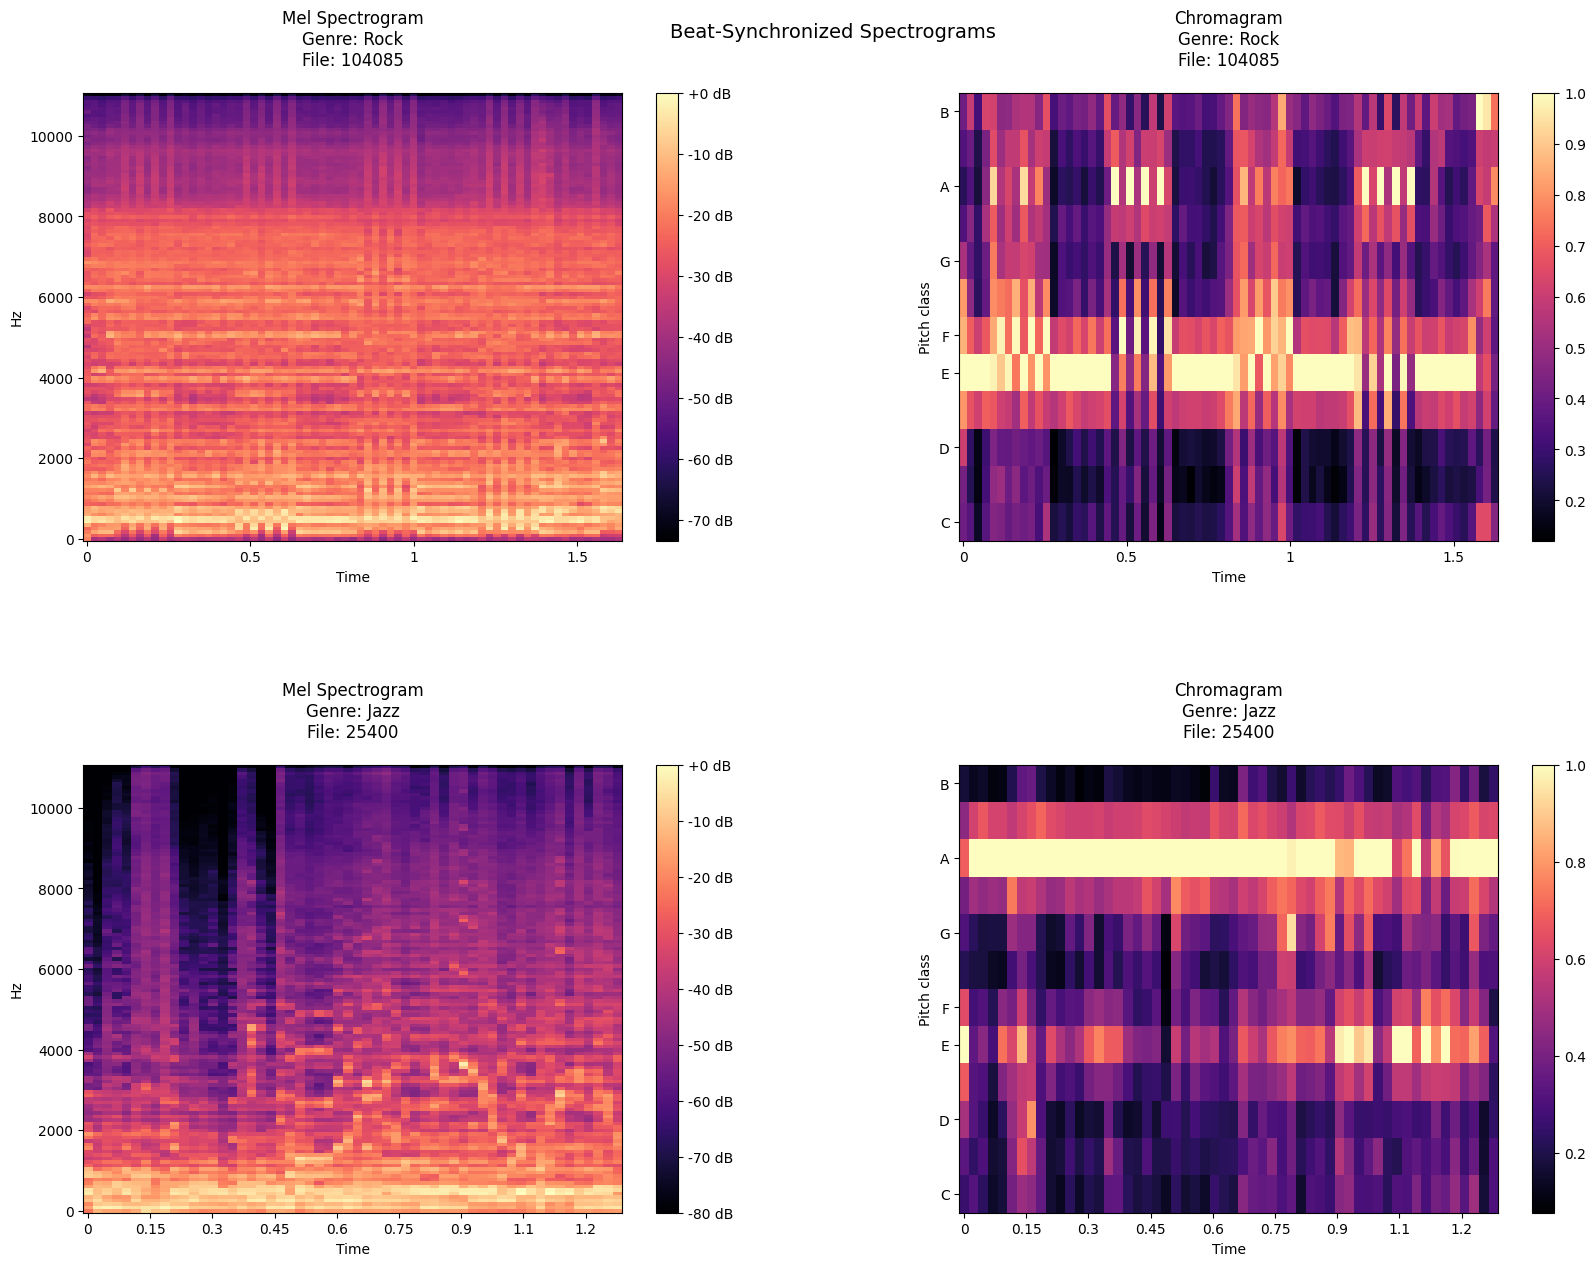

In [183]:
import numpy as np
import pandas as pd
import librosa.display
import matplotlib.pyplot as plt
from pathlib import Path

def process_spectrograms(is_beat: bool = False):
   """
   Process and visualize mel spectrograms and chromagrams for two random music samples.
   Shows file IDs and genres.
   
   Args:
       is_beat (bool): Whether to process beat-synchronized spectrograms.
   """
   base_path = Path('./data/fma_genre_spectrograms_beat' if is_beat else './data/fma_genre_spectrograms')
   labels_file = base_path / 'train_labels.txt'
   
   try:
       df = pd.read_csv(labels_file, sep='\t')
       
       sample1 = df.sample(n=1, random_state=42)
       sample2 = df[df['Genre'] != sample1['Genre'].iloc[0]].sample(n=1)
       
       def process_id(sample_id: str, is_beat: bool) -> str:
           parts = sample_id.split('.')
           base_id = '.'.join(parts[:-1]) if sample_id.endswith('.gz') else sample_id
           
           if is_beat:
               base_id = (base_id.replace('.beatsync.', '.')
                         .rsplit('.', 1))
               return f"{base_id[0]}.full.{base_id[1]}"
           return base_id
       
       # Process IDs
       id1 = process_id(sample1['Id'].iloc[0], is_beat)
       id2 = process_id(sample2['Id'].iloc[0], is_beat)
       
       # Load spectrograms
       specs = []
       labels = []
       file_ids = []
       for sample_id, genre in [(id1, sample1['Genre'].iloc[0]), 
                               (id2, sample2['Genre'].iloc[0])]:
           spec_path = base_path / 'train' / sample_id
           try:
               specs.append(np.load(spec_path))
               labels.append(genre)
               file_ids.append(sample_id.split('.')[0])
           except FileNotFoundError:
               print(f"Could not load spectrogram for {sample_id}")
               continue
               
       # Visualization
       fig, axes = plt.subplots(2, 2, figsize=(20, 14))
       fig.suptitle(f"{'Beat-Synchronized' if is_beat else 'Regular'} Spectrograms", y=0.95, fontsize=14)
       plt.subplots_adjust(hspace=0.5, wspace=0.3, top=0.9, bottom=0.1)
       
       for i, (spec, label, file_id) in enumerate(zip(specs, labels, file_ids)):
           mel, chroma = spec[:128], spec[128:]
           
           # Mel spectrogram
           img1 = librosa.display.specshow(
               mel, 
               x_axis='time', 
               y_axis='linear', 
               ax=axes[i, 0]
           )
           axes[i, 0].set_title(f'Mel Spectrogram\nGenre: {label}\nFile: {file_id}', pad=20)
           fig.colorbar(img1, ax=axes[i, 0], format="%+2.f dB")
           
           # Chromagram
           img2 = librosa.display.specshow(
               chroma, 
               y_axis='chroma', 
               x_axis='time', 
               ax=axes[i, 1]
           )

           axes[i, 1].set_title(f'Chromagram\nGenre: {label}\nFile: {file_id}', pad=20)
           fig.colorbar(img2, ax=axes[i, 1])
       
       plt.show()
       
       return specs, labels, file_ids
       
   except Exception as e:
       print(f"Error processing spectrograms: {str(e)}")
       return None, None, None

# Example usage:
specs_normal, labels_normal, ids_normal = process_spectrograms()
specs_beat, labels_beat, ids_beat = process_spectrograms(is_beat=True)

In [159]:
df = pd.read_csv('./data/fma_genre_spectrograms/train_labels.txt', sep='\t')

In [160]:
df['Genre'].value_counts()

Genre
Blues            160
Chiptune         160
Rock             160
Punk             160
Psych-Rock       160
Psych-Folk       160
Post-Punk        160
Pop              160
Old-Time         160
Jazz             160
International    160
Indie-Rock       160
Hip-Hop          160
Folk             160
Electronic       160
Classical        160
Metal            153
Trip-Hop         137
Soundtrack       124
Post-Rock         95
Name: count, dtype: int64

In [161]:
# Choose two random samples with different genres
sample1 = df.sample(random_state=42)
sample2 = df.sample(random_state=42)


while sample1['Genre'].values[0] == sample2['Genre'].values[0]:
    sample2 = df.sample()
    
sample1, sample2


(                            Id Genre
 2651  104085.fused.full.npy.gz  Rock,
                            Id      Genre
 1952  27766.fused.full.npy.gz  Post-Punk)

In [165]:
# Get the Ids of the samples and remove the .gz extension
id1 = '.'.join(sample1['Id'].values[0].split('.')[0:-1])
id2 = '.'.join(sample2['Id'].values[0].split('.')[0:-1])
id1,id2

('104085.fused.full.npy', '27766.fused.full.npy')

In [ ]:
# Open the spectrograms
spec1 = np.load(f'./data/fma_genre_spectrograms/train/{id1}')
spec2 = np.load(f'./data/fma_genre_spectrograms/train/{id2}')

specs = [spec1, spec2]
labels = [sample1['Genre'].values[0], sample2['Genre'].values[0]]

In [ ]:
spec1.shape, spec2.shape

In [ ]:
import librosa.display
import matplotlib.pyplot as plt


for spec, label in zip(specs,labels):
    mel, chroma = spec[:128], spec[128:]
    

    fig, ax = plt.subplots()
    img = librosa.display.specshow(mel, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title=f'Spectrogram for Genre: {label}')
    fig.colorbar(img, ax=ax, format="%+2.f dB")


    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    ax.set(title=f'Chromagram for Genre: {label}')
    fig.colorbar(img, ax=ax)

In [111]:
df = pd.read_csv('./data/fma_genre_spectrograms_beat/train_labels.txt', sep='\t')

In [112]:
df['Genre'].value_counts()

Genre
Blues            160
Chiptune         160
Rock             160
Punk             160
Psych-Rock       160
Psych-Folk       160
Post-Punk        160
Pop              160
Old-Time         160
Jazz             160
International    160
Indie-Rock       160
Hip-Hop          160
Folk             160
Electronic       160
Classical        160
Metal            153
Trip-Hop         137
Soundtrack       124
Post-Rock         95
Name: count, dtype: int64

In [122]:
# Choose two random samples with different genres
sample1 = df.sample()
sample2 = df.sample()


while sample1['Genre'].values[0] == sample2['Genre'].values[0]:
    sample2 = df.sample()
    
sample1, sample2


(                               Id       Genre
 2220  24659.beatsync.fused.npy.gz  Psych-Folk,
                                Id       Genre
 2383  28201.beatsync.fused.npy.gz  Psych-Rock)

In [127]:
# Get the Ids of the samples and remove the .gz extension
id1 = '.'.join(sample1['Id'].values[0].split('.')[0:-1])
id2 = '.'.join(sample2['Id'].values[0].split('.')[0:-1])

# Remove from both the .beatsync.
id1 = id1.replace('.beatsync.', '.')
id2 = id2.replace('.beatsync.', '.')

# Add before the last part with ., the .full.

id1 = '.'.join(id1.split('.')[0:-1]) + '.full.' + id1.split('.')[-1]
id2 = '.'.join(id2.split('.')[0:-1]) + '.full.' + id2.split('.')[-1]


In [128]:
id1

'24659.fused.full.npy'

In [136]:
# Open the spectrograms
spec1 = np.load(f'./data/fma_genre_spectrograms_beat/train/{id1}')
spec2 = np.load(f'./data/fma_genre_spectrograms_beat/train/{id2}')

specs = [spec1, spec2]
labels = [sample1['Genre'].values[0], sample2['Genre'].values[0]]

In [137]:
spec1.shape

(140, 62)

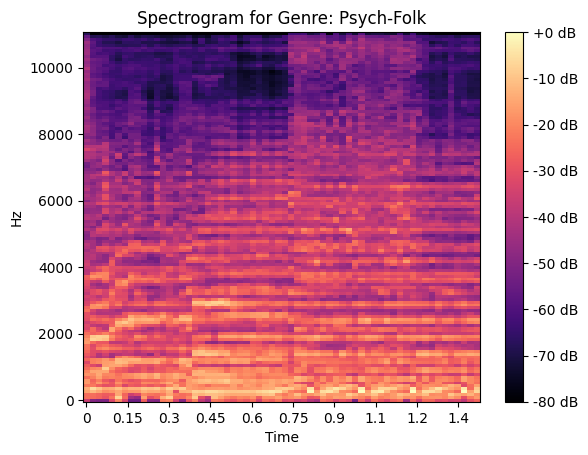

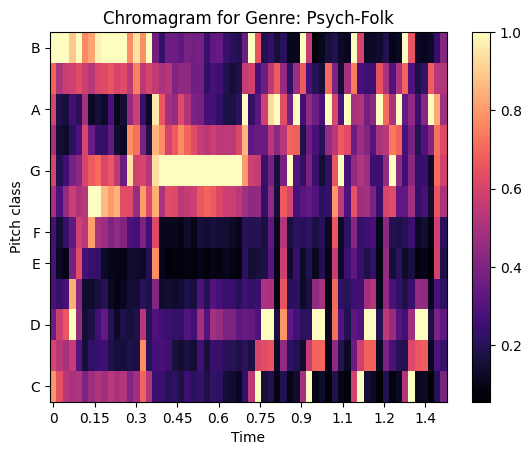

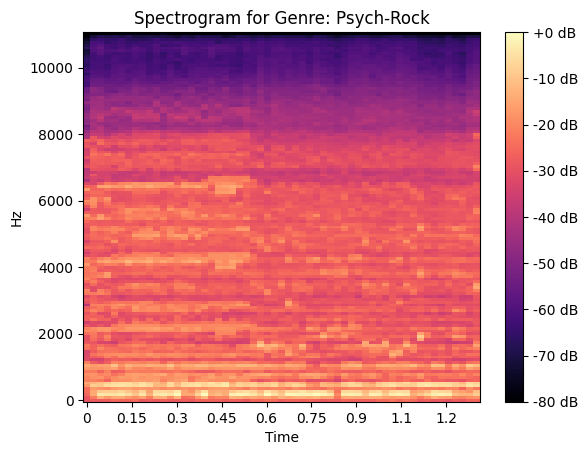

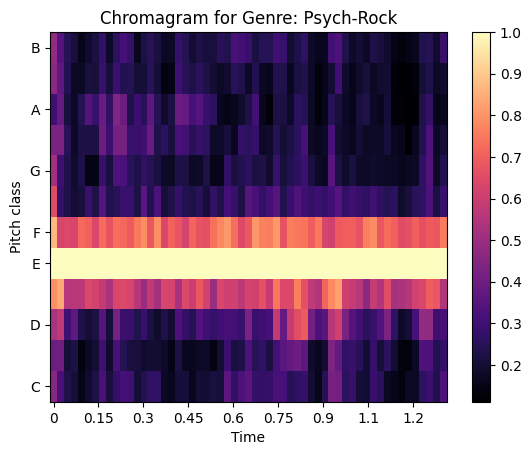

In [138]:
    
import librosa.display
import matplotlib.pyplot as plt


for spec, label in zip(specs,labels):
    mel, chroma = spec[:128], spec[128:]
    

    fig, ax = plt.subplots()
    img = librosa.display.specshow(mel, x_axis='time', y_axis='linear', ax=ax)
    ax.set(title=f'Spectrogram for Genre: {label}')
    fig.colorbar(img, ax=ax, format="%+2.f dB")


    fig, ax = plt.subplots()
    img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
    ax.set(title=f'Chromagram for Genre: {label}')
    fig.colorbar(img, ax=ax)

This is a fused spectrogram + chromagram. The shape is (mel + chroma frequencies, timesteps)

In [4]:
print(spec.shape)  # (frequencies x time steps)

(140, 1293)


To decompose into the mel spectrogram and chromagram you can run:

In [5]:
mel, chroma = spec[:128], spec[128:]

In [6]:
print(mel.shape, chroma.shape)

(128, 1293) (12, 1293)


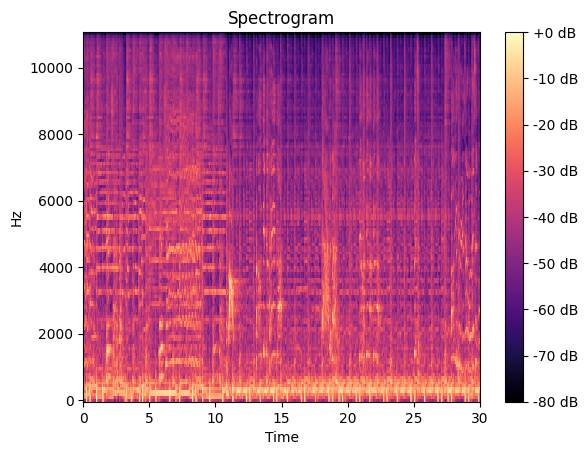

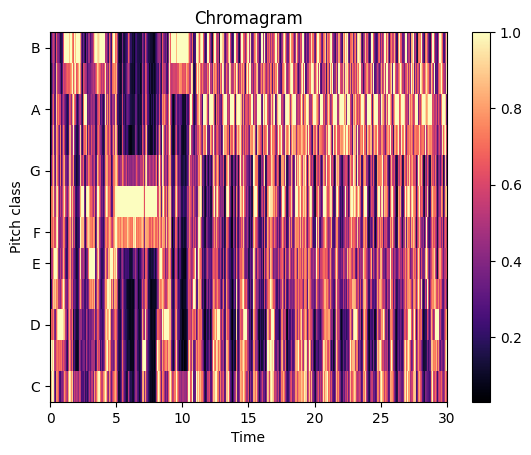

In [7]:
# Plot the spectrogram and the chromagram

import librosa.display
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
img = librosa.display.specshow(mel, x_axis='time', y_axis='linear', ax=ax)
ax.set(title='Spectrogram')
fig.colorbar(img, ax=ax, format="%+2.f dB")


fig, ax = plt.subplots()
img = librosa.display.specshow(chroma, y_axis='chroma', x_axis='time', ax=ax)
ax.set(title='Chromagram')
fig.colorbar(img, ax=ax)

## Creating Pytorch Datasets

We import the necessary modules from the helper code evident at the respective repository:

In [8]:
from dataset import SpectrogramDataset, CLASS_MAPPING, torch_train_val_split

### Initialize a pytorch dataset for beat synced mel spectrograms

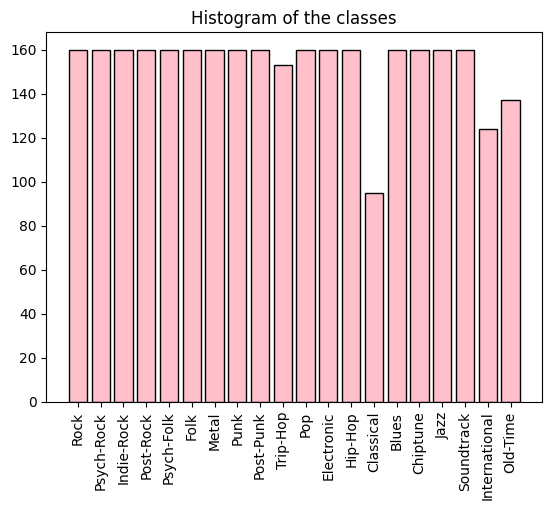

In [ ]:
beat_mel_specs = SpectrogramDataset(
     'data/fma_genre_spectrograms_beat/', class_mapping=None, 
    train=True, feat_type='fused', max_length=-1
)

# Create a histogram of the classes
import matplotlib.pyplot as plt

# Make the bins to have distance and the labels to be the genres with different colors and ignore the bins with no samples

plt.hist(beat_mel_specs.labels, bins=range(0, len(CLASS_MAPPING) + 1), rwidth=0.8, align='left', color='pink', edgecolor='black')
plt.xticks(range(0, len(CLASS_MAPPING)), list(CLASS_MAPPING.keys()), rotation=90)
plt.title('Histogram of the classes')
plt.show()



train_loader_beat_mel, val_loader_beat_mel = torch_train_val_split(beat_mel_specs, 32 ,32, val_size=.33)

Lets see an example sample from the dataset

In [10]:
datum = next(iter(train_loader_beat_mel))
print('Data shape')
print(datum[0].shape)  # shape of data
print('Labels')
print(datum[1])  # labels in batch
print('Lengths')
print(datum[2])  # length of each element in batch

Data shape
torch.Size([32, 129, 128])
Labels
tensor([8, 8, 6, 7, 2, 6, 0, 8, 2, 3, 3, 2, 5, 8, 0, 8, 6, 2, 8, 2, 6, 2, 5, 4,
        3, 3, 7, 2, 6, 0, 3, 6])
Lengths
tensor([ 49,  42,  61,  38,  62,  42,  62,  80,  62,  69,  41,  44,  43,  41,
         61, 108,  61,  52,  68,  58,  52,  54,  50,  45,  40,  45,  75,  54,
         68,  75,  56,  38])


#### Initialize a pytorch dataset for beat synced chromagrams


In [11]:
beat_chroma = SpectrogramDataset(
     'data/fma_genre_spectrograms_beat/', class_mapping=CLASS_MAPPING, 
    train=True, feat_type='chroma', max_length=-1
)
    
train_loader_beat_chroma, val_loader_beat_chroma = torch_train_val_split(beat_chroma, 32 ,32, val_size=.33)

Lets see an example sample from the beat chroma dataset

In [12]:
datum = next(iter(train_loader_beat_chroma))
print('Data shape')
print(datum[0].shape)  # shape of data
print('Labels')
print(datum[1])  # labels in batch
print('Lengths')
print(datum[2])  # length of each element in batch

Data shape
torch.Size([32, 129, 12])
Labels
tensor([2, 9, 5, 0, 2, 5, 2, 4, 9, 0, 3, 2, 8, 0, 6, 6, 9, 5, 2, 2, 7, 2, 3, 2,
        5, 5, 6, 3, 1, 8, 3, 9])
Lengths
tensor([63, 75, 56, 62, 55, 45, 87, 47, 70, 74, 67, 68, 58, 62, 69, 58, 66, 45,
        46, 68, 70, 68, 54, 64, 68, 53, 60, 40, 39, 54, 50, 54])


#### Initialize a pytorch dataset for the fused spectrogram + chromagram for the full (non-beat-synced) data


In [13]:
specs_fused = SpectrogramDataset(
     'data/fma_genre_spectrograms/', class_mapping=CLASS_MAPPING, 
    train=True, feat_type='fused', max_length=-1
)

train_loader, val_loader = torch_train_val_split(specs_fused, 32 ,32, val_size=.33)

In [14]:
datum = next(iter(train_loader))
print('Data shape')
print(datum[0].shape)  # shape of data
print('Labels')
print(datum[1])  # labels in batch
print('Lengths')
print(datum[2])  # length of each element in batch

Data shape
torch.Size([32, 1293, 140])
Labels
tensor([2, 4, 9, 6, 0, 5, 2, 2, 3, 0, 1, 8, 4, 1, 2, 2, 6, 2, 6, 3, 2, 6, 3, 2,
        0, 2, 1, 1, 0, 3, 6, 0])
Lengths
tensor([1291, 1293, 1293, 1292, 1292, 1291, 1291, 1291, 1293, 1291, 1293, 1293,
        1293, 1291, 1291, 1293, 1291, 1293, 1291, 1291, 1291, 1293, 1293, 1292,
        1293, 1291, 1293, 1292, 1291, 1293, 1291, 1291])
